In [1]:
import os

# Path to your dataset
dataset_path = "/kaggle/input/40000-45000-bmc/NEW BONE MARROW"

# Dictionary to store class-wise image counts
class_counts = {}

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


ABE: 8 images
ART: 3000 images
BAS: 441 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 47 images
HAC: 409 images
KSC: 42 images
LYI: 65 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 294 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images


In [2]:
import os

# Path to your dataset
dataset_path = "/kaggle/input/40000-45000-bmc/NEW BONE MARROW"

# Dictionary to store class-wise image counts
class_counts = {}

# Variable to store total image count
total_images = 0

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images
        total_images += num_images  # Update total count

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Print total number of images
print(f"\nTotal images in dataset: {total_images}")


ABE: 8 images
ART: 3000 images
BAS: 441 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 47 images
HAC: 409 images
KSC: 42 images
LYI: 65 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 294 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images

Total images in dataset: 43046


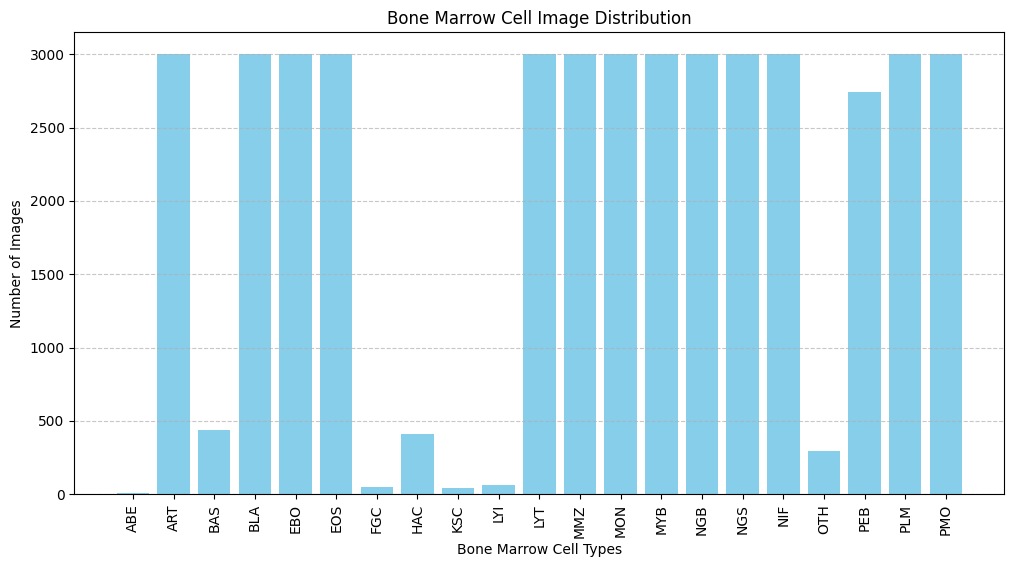

In [3]:
import matplotlib.pyplot as plt

# Class names and their corresponding image counts
classes = [
    "ABE", "ART", "BAS", "BLA", "EBO", "EOS", "FGC", "HAC", "KSC", "LYI",
    "LYT", "MMZ", "MON", "MYB", "NGB", "NGS", "NIF", "OTH", "PEB", "PLM", "PMO"
]
image_counts = [8, 3000, 441, 3000, 3000, 3000, 47, 409, 42, 65, 3000, 3000, 
                3000, 3000, 3000, 3000, 3000, 294, 2740, 3000, 3000]

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(classes, image_counts, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Bone Marrow Cell Types")
plt.ylabel("Number of Images")
plt.title("Bone Marrow Cell Image Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [3]:
import os

dataset_path = "/kaggle/input/40000-45000-bmc/NEW BONE MARROW"
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        class_counts[class_name] = len(os.listdir(class_folder))

print("Class Distribution:", class_counts)


Class Distribution: {'BAS': 441, 'NGS': 3000, 'MMZ': 3000, 'MON': 3000, 'HAC': 409, 'NGB': 3000, 'ART': 3000, 'PLM': 3000, 'NIF': 3000, 'FGC': 47, 'MYB': 3000, 'ABE': 8, 'EBO': 3000, 'OTH': 294, 'KSC': 42, 'LYT': 3000, 'BLA': 3000, 'EOS': 3000, 'PMO': 3000, 'LYI': 65, 'PEB': 2740}


In [4]:
import os
import shutil
import random

# Define paths
original_dataset_path = "/kaggle/input/40000-45000-bmc/NEW BONE MARROW"
writable_dataset_path = "/kaggle/working/NEW_BONE_MARROW"

# Copy dataset to writable directory if not already copied
if not os.path.exists(writable_dataset_path):
    shutil.copytree(original_dataset_path, writable_dataset_path)
    print("✅ Dataset copied to writable directory.")

# Define classes for oversampling
oversample_classes = {"ABE": 500, "KSC": 500, "LYI": 500, "FGC": 500}  # Target count

# Oversampling function
def oversample_class(class_name, target_count):
    class_folder = os.path.join(writable_dataset_path, class_name)
    images = os.listdir(class_folder)
    current_count = len(images)

    if current_count >= target_count:
        return  # No oversampling needed

    for i in range(target_count - current_count):
        img_to_copy = random.choice(images)
        src_path = os.path.join(class_folder, img_to_copy)
        new_img_name = f"copy_{i}_{img_to_copy}"
        dst_path = os.path.join(class_folder, new_img_name)
        shutil.copy(src_path, dst_path)  # Duplicate the image

# Apply oversampling to small classes
for class_name, target in oversample_classes.items():
    oversample_class(class_name, target)

print("✅ Oversampling completed successfully.")


✅ Dataset copied to writable directory.
✅ Oversampling completed successfully.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import random

# Define dataset path
dataset_path = "/kaggle/working/NEW_BONE_MARROW"  # Ensure you use the writable dataset path

# Augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(class_name, num_augmented):
    class_folder = os.path.join(dataset_path, class_name)
    images = os.listdir(class_folder)

    for i in range(num_augmented):
        img_name = random.choice(images)
        img_path = os.path.join(class_folder, img_name)

        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, axis=0)

        # Generate augmented image (Use __next__() instead of .next())
        aug_img = datagen.flow(img, batch_size=1).__next__()[0].astype(np.uint8)

        # Save augmented image
        aug_img_name = f"aug_{i}_{img_name}"
        cv2.imwrite(os.path.join(class_folder, aug_img_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

# Apply augmentation to moderate-sized classes
moderate_classes = {"OTH": 1000, "BAS": 1000, "HAC": 1000}
for class_name, target_count in moderate_classes.items():
    current_count = len(os.listdir(os.path.join(dataset_path, class_name)))
    num_augmented = target_count - current_count
    if num_augmented > 0:
        augment_images(class_name, num_augmented)

print("✅ Data augmentation completed successfully.")


✅ Data augmentation completed successfully.


In [6]:
import os

# Path to your dataset
dataset_path = "/kaggle/working/NEW_BONE_MARROW"

# Dictionary to store class-wise image counts
class_counts = {}

# Variable to store total image count
total_images = 0

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images
        total_images += num_images  # Update total count

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Print total number of images
print(f"\nTotal images after agumentation in dataset: {total_images}")


ABE: 500 images
ART: 3000 images
BAS: 1000 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 500 images
HAC: 1000 images
KSC: 500 images
LYI: 500 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 1000 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images

Total images after agumentation in dataset: 46740


In [7]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset
dataset_path = "/kaggle/working/NEW_BONE_MARROW"

# Get class names
class_names = sorted(os.listdir(dataset_path))

# Set number of samples to display (1 per class)
num_classes = len(class_names)
cols = 5  # Number of columns in the plot
rows = (num_classes // cols) + 1  # Calculate rows based on total classes

# Create a figure for displaying images
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# Loop through each class and pick a random image
for i, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):
        images = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if images:  # If images exist in the folder
            random_image = random.choice(images)
            img_path = os.path.join(class_folder, random_image)
            
            # Load and display the image
            img = Image.open(img_path)
            ax = axes[i // cols, i % cols]
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis("off")

# Remove empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

In [8]:
import os
import cv2
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/kaggle/working/NEW_BONE_MARROW"  # Ensure we use a writable directory

# Augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Classes that need further augmentation
small_classes = ["ABE", "FGC", "KSC", "LYI", "BAS", "HAC", "OTH"]
target_count = 3000  # Goal: Make all classes have 3000 images

def augment_images(class_name, num_augmented):
    class_folder = os.path.join(dataset_path, class_name)
    images = os.listdir(class_folder)

    for i in range(num_augmented):
        img_name = random.choice(images)
        img_path = os.path.join(class_folder, img_name)

        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, axis=0)

        # Generate augmented image
        aug_img = datagen.flow(img, batch_size=1).__next__()[0].astype(np.uint8)

        # Save augmented image
        aug_img_name = f"aug_{i}_{img_name}"
        cv2.imwrite(os.path.join(class_folder, aug_img_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

# Apply augmentation to small classes
for class_name in small_classes:
    class_folder = os.path.join(dataset_path, class_name)
    current_count = len(os.listdir(class_folder))
    num_augmented = target_count - current_count  # Number of images needed

    if num_augmented > 0:
        print(f"🔄 Augmenting {num_augmented} images for {class_name}...")
        augment_images(class_name, num_augmented)

print("✅ Dataset fully balanced! All classes now have 3000 images.")



🔄 Augmenting 2500 images for ABE...
🔄 Augmenting 2500 images for FGC...
🔄 Augmenting 2500 images for KSC...
🔄 Augmenting 2500 images for LYI...
🔄 Augmenting 2000 images for BAS...
🔄 Augmenting 2000 images for HAC...
🔄 Augmenting 2000 images for OTH...
✅ Dataset fully balanced! All classes now have 3000 images.


In [9]:
import os

# Path to your dataset
dataset_path = "/kaggle/working/NEW_BONE_MARROW"

# Dictionary to store class-wise image counts
class_counts = {}

# Variable to store total image count
total_images = 0

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images
        total_images += num_images  # Update total count

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Print total number of images

print(f"\nTotal images after fully agumentation in dataset: {total_images}")


ABE: 3000 images
ART: 3000 images
BAS: 3000 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 3000 images
HAC: 3000 images
KSC: 3000 images
LYI: 3000 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 3000 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images

Total images after fully agumentation in dataset: 62740


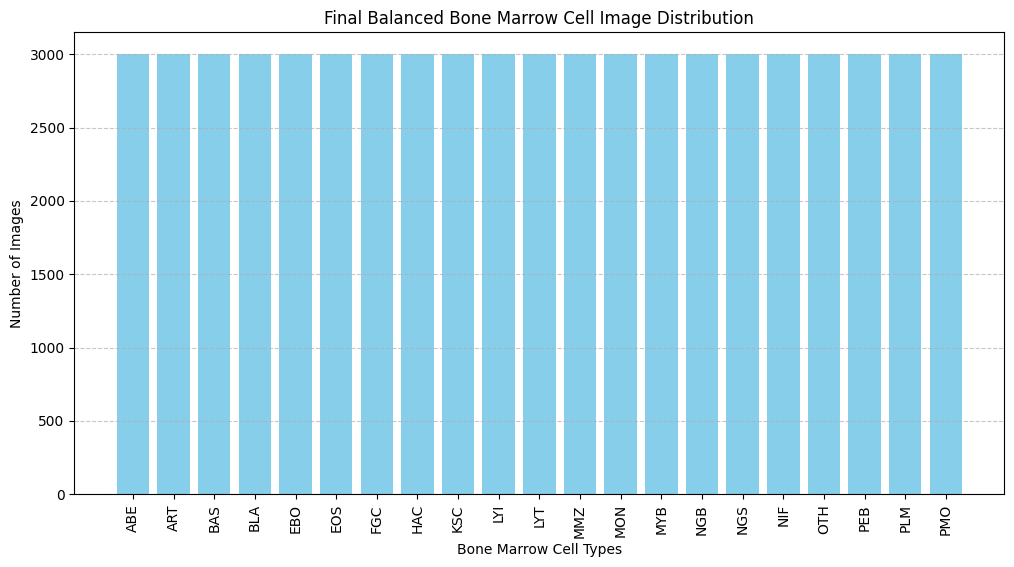

In [10]:
import matplotlib.pyplot as plt

# Class names and their final image counts
classes = [
    "ABE", "ART", "BAS", "BLA", "EBO", "EOS", "FGC", "HAC", "KSC", "LYI",
    "LYT", "MMZ", "MON", "MYB", "NGB", "NGS", "NIF", "OTH", "PEB", "PLM", "PMO"
]
image_counts = [3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 
                3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000] 

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(classes, image_counts, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Bone Marrow Cell Types")
plt.ylabel("Number of Images")
plt.title("Final Balanced Bone Marrow Cell Image Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the graph
plt.show()


In [11]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "/kaggle/working/NEW_BONE_MARROW"  # Original dataset
output_base = "/kaggle/working/SPLIT_DATASET"  # New dataset location

# Define split ratios
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Create base directories for splits
for split in ["train", "val", "test"]:
    create_dir(os.path.join(output_base, split))

# Iterate over each class and split images
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        images = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(images)  # Shuffle for randomness
        
        # Compute split sizes
        total = len(images)
        train_size = int(total * train_ratio)
        val_size = int(total * val_ratio)
        
        # Split images
        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Create class subfolders
        for split in ["train", "val", "test"]:
            create_dir(os.path.join(output_base, split, class_name))

        # Copy images to respective directories
        for img_name in train_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "train", class_name, img_name))

        for img_name in val_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "val", class_name, img_name))

        for img_name in test_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "test", class_name, img_name))

print("✅ Dataset successfully split into Train, Validation, and Test sets.")


✅ Dataset successfully split into Train, Validation, and Test sets.


In [12]:
import os

# Define split dataset path
split_dataset_path = "/kaggle/working/SPLIT_DATASET"

# Dictionary to store image counts
split_counts = {"train": {}, "val": {}, "test": {}}
total_counts = {"train": 0, "val": 0, "test": 0}

# Iterate over train, val, test folders
for split in ["train", "val", "test"]:
    split_folder = os.path.join(split_dataset_path, split)
    
    for class_name in sorted(os.listdir(split_folder)):
        class_folder = os.path.join(split_folder, class_name)
        
        if os.path.isdir(class_folder):  # Ensure it's a directory
            num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
            split_counts[split][class_name] = num_images
            total_counts[split] += num_images  # Update total count

# Print the number of images per class in each split
for split in ["train", "val", "test"]:
    print(f"\n📂 {split.upper()} SET:")
    for class_name, count in split_counts[split].items():
        print(f"   {class_name}: {count} images")
    print(f"🔹 Total images in {split}: {total_counts[split]}")

# Print total images across all splits
grand_total = sum(total_counts.values())
print(f"\n✅ Grand Total images after splitting: {grand_total}")



📂 TRAIN SET:
   ABE: 2100 images
   ART: 2100 images
   BAS: 2100 images
   BLA: 2100 images
   EBO: 2100 images
   EOS: 2100 images
   FGC: 2100 images
   HAC: 2100 images
   KSC: 2100 images
   LYI: 2100 images
   LYT: 2100 images
   MMZ: 2100 images
   MON: 2100 images
   MYB: 2100 images
   NGB: 2100 images
   NGS: 2100 images
   NIF: 2100 images
   OTH: 2100 images
   PEB: 1917 images
   PLM: 2100 images
   PMO: 2100 images
🔹 Total images in train: 43917

📂 VAL SET:
   ABE: 450 images
   ART: 450 images
   BAS: 450 images
   BLA: 450 images
   EBO: 450 images
   EOS: 450 images
   FGC: 450 images
   HAC: 450 images
   KSC: 450 images
   LYI: 450 images
   LYT: 450 images
   MMZ: 450 images
   MON: 450 images
   MYB: 450 images
   NGB: 450 images
   NGS: 450 images
   NIF: 450 images
   OTH: 450 images
   PEB: 411 images
   PLM: 450 images
   PMO: 450 images
🔹 Total images in val: 9411

📂 TEST SET:
   ABE: 450 images
   ART: 450 images
   BAS: 450 images
   BLA: 450 images
   EBO:

In [13]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')


Found 43917 images belonging to 21 classes.
Found 9411 images belonging to 21 classes.
234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1373/1373 ━━━━━━━━━━━━━━━━━━━━ 874s 515ms/step - accuracy: 0.4077 - loss: 2.4196 - val_accuracy: 0.7732 - val_loss: 1.3070 - learning_rate: 0.0010
Epoch 2/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 595s 431ms/step - accuracy: 0.7631 - loss: 1.3731 - val_accuracy: 0.8068 - val_loss: 1.1973 - learning_rate: 0.0010
Epoch 3/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 595s 431ms/step - accuracy: 0.8088 - loss: 1.2430 - val_accuracy: 0.8224 - val_loss: 1.1478 - learning_rate: 0.0010
Epoch 4/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 597s 433ms/step - accuracy: 0.8238 - loss: 1.1835 - val_accuracy: 0.8252 - val_loss: 1.1336 - learning_rate: 0.0010
Epoch 5/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 593s 430ms/step - accuracy: 0.8439 - loss: 1.1301 - val_accuracy: 0.8410 - val_loss: 1.0940 - learning_rate: 0.0010
Epoch 6/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 588s 426ms/step - accuracy: 0.8573 - loss: 1.0968 - val_accuracy: 0.8372 - val_loss: 1.0989 - learning_rate: 0.0010
Epoch 7/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 587s 425ms/step - acc

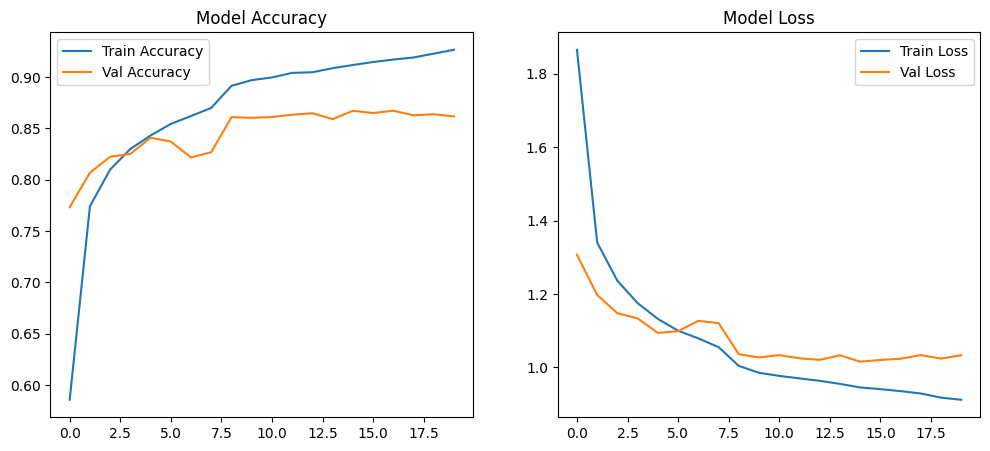

✅ Model training complete! Best model saved as 'best_resnet152_model.keras'


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

# Define dataset paths
data_dir = "/kaggle/working/SPLIT_DATASET"

# Image parameters
img_size = (224, 224)  # ResNet152 default input size
batch_size = 32

# Data augmentation for training (more robust transformations)
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,  # ResNet-specific normalization
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]  # Adjust brightness randomly
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation dataset
val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load ResNet152 pre-trained model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[-30:]:  
    layer.trainable = True  # Fine-tune last 30 layers

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)  # L2 regularization added
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model with optimized SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True), 
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1), 
              metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_resnet152_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Reduce LR on plateau
]

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Train for more epochs with early stopping
    callbacks=callbacks
)

# Function to plot training performance
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend() 
    plt.title('Model Loss')
    
    plt.show()

# Show performance
plot_history(history)

print("✅ Model training complete! Best model saved as 'best_resnet152_model.keras'")


In [15]:
# Load test dataset (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Don't shuffle for evaluation
)
# Load the best saved model
best_model = tf.keras.models.load_model("best_resnet152_model.keras")
# Evaluate model on test set
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


Found 9412 images belonging to 21 classes.
295/295 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.8985 - loss: 0.9597
✅ Test Accuracy: 86.73%
✅ Test Loss: 1.0266


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels
true_labels = test_generator.classes

# Predict classes
pred_probs = best_model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate classification report
class_names = list(test_generator.class_indices.keys())
print(classification_report(true_labels, pred_labels, target_names=class_names))


295/295 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step
              precision    recall  f1-score   support

         ABE       1.00      1.00      1.00       450
         ART       0.88      0.82      0.85       450
         BAS       0.99      0.94      0.96       450
         BLA       0.72      0.75      0.73       450
         EBO       0.91      0.88      0.89       450
         EOS       0.97      0.97      0.97       450
         FGC       1.00      1.00      1.00       450
         HAC       0.99      0.94      0.97       450
         KSC       1.00      1.00      1.00       450
         LYI       1.00      0.99      1.00       450
         LYT       0.77      0.86      0.81       450
         MMZ       0.66      0.72      0.69       450
         MON       0.82      0.78      0.80       450
         MYB       0.74      0.71      0.72       450
         NGB       0.71      0.75      0.73       450
         NGS       0.78      0.86      0.82       450
         NIF       0.73      0.70    

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Load test dataset
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),  # Ensure "test" directory exists
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep order for correct evaluation
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Get true labels and predicted labels
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


# # # # GRAD -CAM ****

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load trained model
model_path = "best_resnet152_model.keras"
model = load_model(model_path)

# Function to preprocess image
def preprocess_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
    return img, img_array

# Grad-CAM function
def grad_cam(model, img_array, class_index=None, layer_name="conv5_block3_out"):
    """
    Generate Grad-CAM heatmap for an image and overlay it.
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = np.argmax(predictions[0])  # Get predicted class index
        loss = predictions[:, class_index]  # Focus on the predicted class

    grads = tape.gradient(loss, conv_outputs)  # Compute gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global average pooling

    # Compute activation heatmap
    conv_outputs = conv_outputs[0]
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]  # Weighted activations

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap /= np.max(heatmap)  # Normalize between 0 and 1

    return heatmap

# Overlay heatmap on original image
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))  # Resize to match image
    heatmap = np.uint8(255 * heatmap)  # Convert to 0-255 scale
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply color map
    superimposed_img = cv2.addWeighted(np.array(img), 1-alpha, heatmap, alpha, 0)
    return superimposed_img

# Run Grad-CAM on a test image
img_path = "path_to_your_test_image.jpg"  # Change this to your test image path
original_img, img_array = preprocess_image(img_path)

# Get Grad-CAM heatmap
heatmap = grad_cam(model, img_array)

# Overlay heatmap on the image
cam_result = overlay_heatmap(original_img, heatmap)

# Display original and Grad-CAM images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cam_result)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.show()


Found 9414 images belonging to 21 classes.
  1/295 ━━━━━━━━━━━━━━━━━━━━ 1:03 215ms/step - accuracy: 1.0000 - loss: 0.6841

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 36s 123ms/step - accuracy: 0.8740 - loss: 1.0063

✅ Test Accuracy: 0.8440
295/295 ━━━━━━━━━━━━━━━━━━━━ 47s 130ms/step


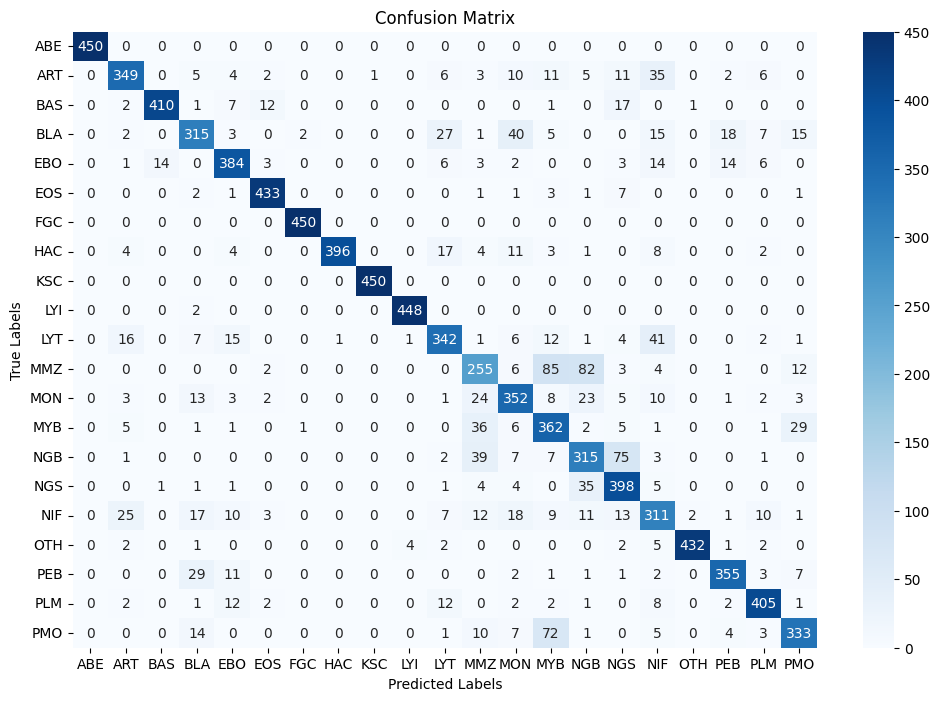


Classification Report:
              precision    recall  f1-score   support

         ABE       1.00      1.00      1.00       450
         ART       0.85      0.78      0.81       450
         BAS       0.96      0.91      0.94       451
         BLA       0.77      0.70      0.73       450
         EBO       0.84      0.85      0.85       450
         EOS       0.94      0.96      0.95       450
         FGC       0.99      1.00      1.00       450
         HAC       1.00      0.88      0.94       450
         KSC       1.00      1.00      1.00       450
         LYI       0.99      1.00      0.99       450
         LYT       0.81      0.76      0.78       450
         MMZ       0.65      0.57      0.60       450
         MON       0.74      0.78      0.76       450
         MYB       0.62      0.80      0.70       450
         NGB       0.66      0.70      0.68       450
         NGS       0.73      0.88      0.80       450
         NIF       0.67      0.69      0.68       450
   

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Load test dataset
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),  # Ensure "test" directory exists
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep order for correct evaluation
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Get true labels and predicted labels
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
